In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({ 
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False
})

In [2]:
from glob import glob
import os

def loadFile(file):
    name = os.path.splitext(os.path.split(file)[-1])[0]
    df = pd.read_csv(file, index_col="pow")
    return (name, df)


dfs = dict([loadFile(file) for file in glob("results/*.csv")])

def constructSuffixMap(suffix: str):
    sfx = "_" + suffix
    return { k.replace(sfx, ""): v for k, v in dfs.items() if k.endswith(sfx) }

def constructFrame(suffix: str, type: str):
    dfMap = constructSuffixMap(suffix)
    return pd.concat([v[type].rename(k) for k, v in dfMap.items()], axis=1)

def getLatexPlot(plot):
    fig = plot.get_figure()
    fig.set_size_inches(w=5.10686, h=3)

    plot.legend(
        loc='lower left',
        bbox_transform=fig.transFigure,
        mode="expand",
        ncol=4,
        bbox_to_anchor=(0.0, -0.18, 0.98, 1),
        frameon=False
    )
    plot.set_xlabel("Number of items")
    plot.set_xscale("log", base=2)

    plot.set_ylabel("Operations per second")
    plot.set_yscale("log", base=10)

    plot.grid(color="lightgray", linestyle="-.", linewidth=0.7)
    return fig

def saveLatexPlot(plot, name):
    return getLatexPlot(plot).savefig("../components/figure/" + name, bbox_inches="tight")

def transformThroughput(df: pd.DataFrame):
    powSeries = pd.Series([1 << i for i in df.index])
    powDf = pd.concat([powSeries for x in range(len(df.columns))], axis=1, keys=df.columns).set_index(df.index) 
    thrDf = powDf / df * 1000
    return thrDf.set_index(powSeries)

def transformResults(df: pd.DataFrame):
    ranks = [x for x in df.columns]
    def getRank(x):
        if x == "std::map": return 1
        elif "tnl" in x and "host" not in x: return 2
        elif "owg" in x or "palm" in x: return 3
        else: return 4

    ranks.sort(key=lambda x: (getRank(x), x))
    return pd.concat([(df["std::map"] / df[x]).rename(x) if x != "std::map" else df[x] for x in ranks], axis=1)



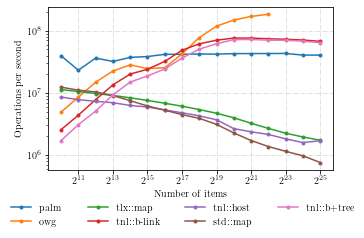

In [3]:
plot = transformThroughput(constructFrame("insert", "shuffle")).plot(style=".-")
saveLatexPlot(plot, "insert.pgf")

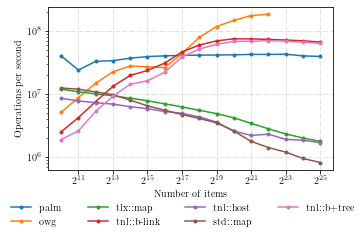

In [4]:
plot = transformThroughput(constructFrame("insert", "gaussian")).plot(style=".-")
saveLatexPlot(plot, "insert-gaussian.pgf")


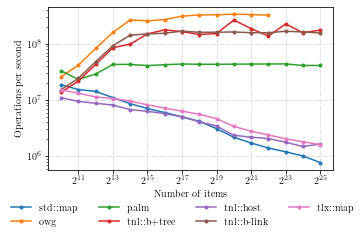

In [5]:
plot = transformThroughput(constructFrame("query", "shuffle")).plot(style=".-")
test = saveLatexPlot(plot, "query.pgf")

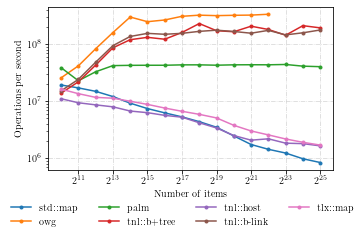

In [6]:
getLatexPlot(transformThroughput(constructFrame("query", "gaussian")).plot(style=".-"));

,palm,owg,tlx::map,tnl::b-link,tnl::host,std::map,tnl::b+tree
pow,,,,,,,
10,0.0259,0.207882,0.0905,0.398666,0.1194,0.0827,0.596896
11,0.0882,0.239760,0.1948,0.466342,0.2629,0.1851,0.663552
12,0.1126,0.275514,0.4185,0.524867,0.5592,0.3947,0.802048
13,0.2550,0.363008,0.8983,0.607974,1.1764,0.9029,0.878368
14,0.4394,0.580096,1.9647,0.814826,2.6047,2.1829,1.097700
15,0.8518,1.328200,4.3227,1.364150,5.5246,5.3125,1.746940
16,1.5692,2.579880,9.6031,2.036990,12.2832,12.4293,2.704380
17,3.1317,3.092220,21.4199,2.695010,27.3497,29.2797,3.606530
18,6.1933,3.372040,48.5504,4.253320,61.1766,67.2148,5.177950


,palm,owg,tlx::map,tnl::b-link,tnl::host,std::map,tnl::b+tree
pow,,,,,,,
10,0.0245,0.203302,0.0459,0.375046,0.0403,0.0815,0.534176
11,0.0850,0.231347,0.0972,0.476698,0.0876,0.1699,0.732288
12,0.1143,0.271862,0.2055,0.537661,0.1798,0.3761,0.816128
13,0.2616,0.344125,0.4446,0.607741,0.3781,0.8962,0.987136
14,0.4599,0.528691,0.9700,0.804534,0.7869,2.1226,1.215490
15,0.8543,1.055480,2.0694,1.322510,1.7128,4.8079,1.893380
16,1.6198,2.474080,4.4955,2.460340,3.4580,11.5680,3.441660
17,3.0883,7.671780,9.5469,4.177190,7.3415,25.1659,6.074560
18,6.1741,15.257900,20.2101,7.585680,16.4031,55.2121,11.635400


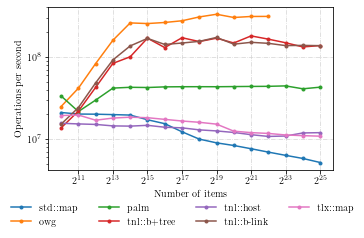

In [17]:
display(constructFrame("insert", "shuffle"))
display(constructFrame("insert", "increasing"))


saveLatexPlot(transformThroughput(constructFrame("query", "decreasing")).plot(style=".-"), "test.pgf")

In [8]:
df = transformResults(constructFrame("query", "shuffle"))
print(df.to_latex(float_format= "%.3f" ))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  std::map &  tnl::b+tree &  tnl::b-link &     owg &   palm &  tlx::map &  tnl::host \\
pow &           &              &              &         &        &           &            \\
\midrule
10  &     0.055 &        0.730 &        0.814 &   1.383 &  1.767 &     0.804 &      0.588 \\
11  &     0.133 &        1.416 &        1.583 &   2.722 &  1.512 &     0.861 &      0.615 \\
12  &     0.288 &        3.024 &        3.383 &   5.825 &  2.035 &     0.798 &      0.615 \\
13  &     0.742 &        7.703 &        8.363 &  14.415 &  3.904 &     0.964 &      0.737 \\
14  &     1.901 &       11.457 &       16.556 &  30.823 &  4.980 &     1.111 &      0.785 \\
15  &     4.632 &       21.204 &       21.189 &  36.124 &  5.800 &     1.162 &      0.891 \\
16  &    10.918 &       29.534 &       25.694 &  44.915 &  7.080 &     1.200 &      0.955 \\
17  &    26.074 &       32.771 &       33.447 &  61.745 &  8.694 &     1.260 &      0.999 \\
18  &    62.571 &       34.

In [9]:
df = transformResults(constructFrame("insert", "shuffle"))
print(df.to_latex(float_format= "%.3f" ))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  std::map &  tnl::b+tree &  tnl::b-link &     owg &   palm &  tlx::map &  tnl::host \\
pow &           &              &              &         &        &           &            \\
\midrule
10  &     0.083 &        0.139 &        0.207 &   0.398 &  3.193 &     0.914 &      0.693 \\
11  &     0.185 &        0.279 &        0.397 &   0.772 &  2.099 &     0.950 &      0.704 \\
12  &     0.395 &        0.492 &        0.752 &   1.433 &  3.505 &     0.943 &      0.706 \\
13  &     0.903 &        1.028 &        1.485 &   2.487 &  3.541 &     1.005 &      0.768 \\
14  &     2.183 &        1.989 &        2.679 &   3.763 &  4.968 &     1.111 &      0.838 \\
15  &     5.312 &        3.041 &        3.894 &   4.000 &  6.237 &     1.229 &      0.962 \\
16  &    12.429 &        4.596 &        6.102 &   4.818 &  7.921 &     1.294 &      1.012 \\
17  &    29.280 &        8.119 &       10.864 &   9.469 &  9.349 &     1.367 &      1.071 \\
18  &    67.215 &       12.

In [10]:
df = transformResults(constructFrame("query", "increasing"))
print(df.to_latex(float_format= "%.3f" ))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  std::map &  tnl::b+tree &  tnl::b-link &    owg &  palm &  tlx::map &  tnl::host \\
pow &           &              &              &        &       &           &            \\
\midrule
10  &     0.045 &        0.582 &        0.668 &  1.075 & 1.827 &     0.839 &      0.678 \\
11  &     0.097 &        1.029 &        1.134 &  1.906 & 1.178 &     0.885 &      0.705 \\
12  &     0.199 &        2.068 &        2.324 &  4.048 & 1.574 &     0.793 &      0.728 \\
13  &     0.406 &        3.787 &        4.588 &  7.920 & 2.049 &     0.784 &      0.712 \\
14  &     0.842 &        4.201 &        6.787 & 13.267 & 2.158 &     0.803 &      0.751 \\
15  &     1.879 &        7.654 &       10.023 & 14.823 & 2.531 &     0.883 &      0.836 \\
16  &     4.321 &        9.529 &       10.164 & 17.443 & 2.856 &     0.957 &      0.890 \\
17  &    10.829 &       10.986 &       11.581 & 23.388 & 3.556 &     1.130 &      1.080 \\
18  &    26.453 &       15.397 &       15.930 &

In [11]:
df = transformResults(constructFrame("query", "gaussian"))
print(df.to_latex(float_format= "%.3f" ))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  std::map &  tnl::b+tree &  tnl::b-link &     owg &   palm &  tlx::map &  tnl::host \\
pow &           &              &              &         &        &           &            \\
\midrule
10  &     0.053 &        0.718 &        0.790 &   1.337 &  2.015 &     0.844 &      0.573 \\
11  &     0.120 &        1.283 &        1.413 &   2.442 &  1.336 &     0.792 &      0.548 \\
12  &     0.275 &        2.889 &        3.246 &   5.599 &  2.207 &     0.783 &      0.578 \\
13  &     0.679 &        7.183 &        7.844 &  13.322 &  3.496 &     0.935 &      0.660 \\
14  &     1.776 &       13.042 &       14.864 &  32.605 &  4.622 &     1.081 &      0.728 \\
15  &     4.420 &       17.847 &       20.958 &  33.606 &  5.770 &     1.184 &      0.847 \\
16  &    10.511 &       19.661 &       24.018 &  42.836 &  6.860 &     1.215 &      0.904 \\
17  &    24.738 &       30.426 &       29.363 &  58.490 &  8.205 &     1.254 &      0.987 \\
18  &    59.972 &       52.

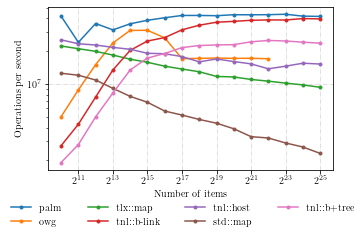

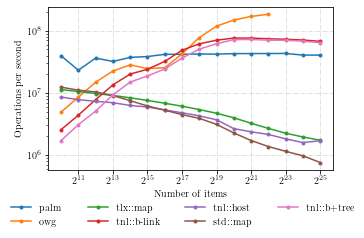

In [12]:
saveLatexPlot(transformThroughput(constructFrame("insert", "increasing")).plot(style=".-"), "insert-increasing.pgf");
saveLatexPlot(transformThroughput(constructFrame("insert", "shuffle")).plot(style=".-"), "insert-shuffle.pgf");